In [0]:
pip install plotly-express

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# File location and type
file_location = "/tmp/ufoTransfor"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)
df.printSchema()

Date/Time,City,State,Country,Code,Shape,Duration,Summary,Posted,Images
2022-06-05T06:19:00.000+0000,cabramatta,new south wales,australia,AUS,light,10 minutes,Saw moving objects and then disappeared,06/05/22,no
2022-06-03T21:55:00.000+0000,mount clemens,mi,usa,USA,rectangle,Approximately 1 second,"At dusk, looking almost straight up, a silent, crisp, bluish white rectangle raced across the sky in about one second.",06/03/22,yes
2022-05-26T22:04:00.000+0000,dallas,tx,usa,USA,unknown,unknown,this light was bouncing around so we knew it couldn't be an airplane so i started taking pictures,5/26/22,yes
2022-05-17T23:30:00.000+0000,steelton,pa,usa,USA,oval,5-7 min,"Oval shaped object with lights, hovering",5/17/22,no
2022-03-30T20:42:00.000+0000,denver,co,usa,USA,disk,unknown,"going on a walk and we saw a disk in the sky very bright and almost was blinding, heard a sound hurt my eardrums,dogs braked like hell",3/30/22,no
2022-03-30T11:51:00.000+0000,elizabeth,co,usa,USA,unknown,unknown,MADAR Node 34,3/30/22,no
2022-03-29T15:00:00.000+0000,long beach,ca,usa,USA,circle,Approx 10 seconds,Three crescent lights traveling high altitude,3/29/22,no
2022-03-15T19:30:00.000+0000,tarzana,ca,usa,USA,formation,Not sure,Filmed sunset on timelapse,3/15/22,yes
2022-02-28T11:27:00.000+0000,norris city,il,usa,USA,unknown,unknown,MADAR Node 115,2/28/22,no
2022-02-24T14:44:00.000+0000,edmond,or,usa,USA,unknown,unknown,MADAR Node 197,2/24/22,no


root
 |-- Date/Time: timestamp (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Shape: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Summary: string (nullable = true)
 |-- Posted: string (nullable = true)
 |-- Images: string (nullable = true)



##Data display:

In [0]:
from pyspark.sql import *
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import geopandas as gpd
#from geopandas import GeoDataFrame
import plotly.express as px

Out[3]: <AxesSubplot:title={'center':'UFO sighting reports per century'}, ylabel='%'>

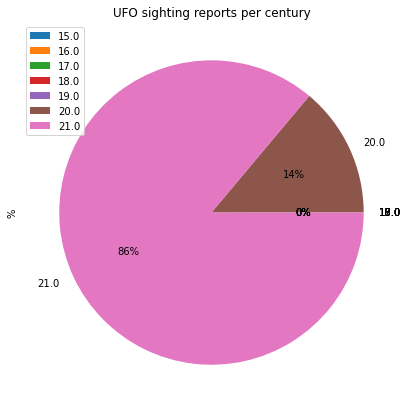

In [0]:
#As expected UFO sighting report tracking started to rise in the 20th and 21st century
df2 = df.withColumn("Century", (year("Date/Time").substr(1,2)+lit(1)).cast("int"))\
        .groupBy("Century").count().sort(col("count").desc())\
        .withColumn('%', col('count')/sum('count').over(Window.partitionBy())*100)\
        .withColumn("%", round("%", 3))

#df2.groupby("Century").sum().plot(kind='pie', y='%')

df2 = df2.toPandas()
df2.groupby(["Century"]).sum().plot(figsize=(14,7), kind='pie', y="%", autopct='%1.0f%%', title="UFO sighting reports per century")

Out[4]: <AxesSubplot:title={'center':'UFO sighting reports per year'}, xlabel='year(Date/Time)'>

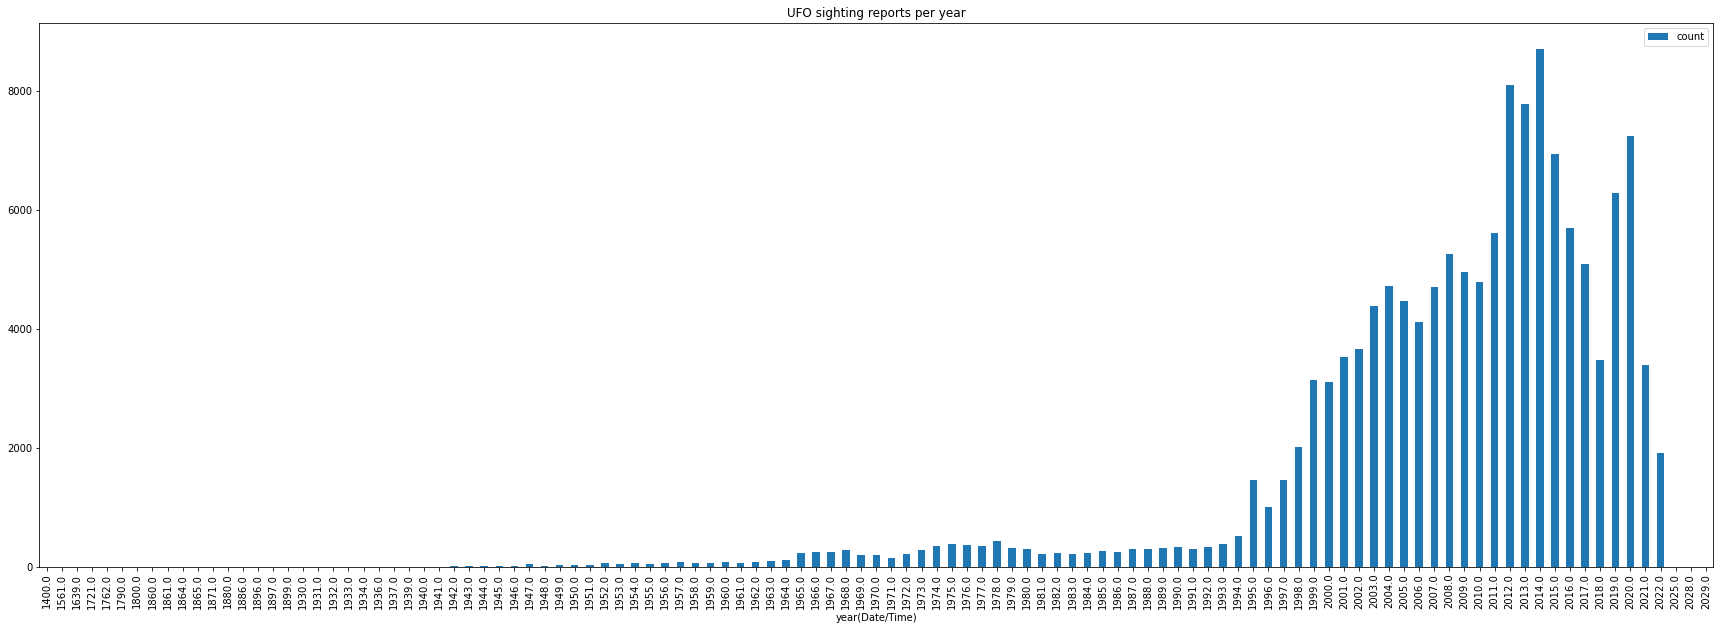

In [0]:
#And the biggest number of UFO sightings happened in the last 10 years
df2 = df.groupBy(year("Date/Time")).count().sort(col("count").desc())\
        .withColumn('%', col('count')/sum('count').over(Window.partitionBy())*100)\
        .withColumn("%", round("%", 2))

df2 = df2.toPandas()
df2.groupby(["year(Date/Time)"]).sum().plot(figsize=(30,10), kind='bar', y="count", title="UFO sighting reports per year")

Out[5]: <AxesSubplot:title={'center':'Most common UFO shape'}, ylabel='%'>

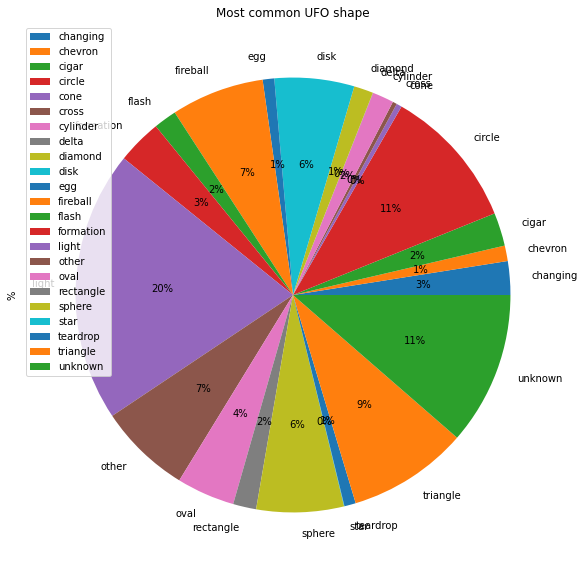

In [0]:
#Most popular UFO shape is a bright light in the sky
df2 = df.groupBy("Shape").count().sort(col("count").desc())\
        .withColumn('%', col('count')/sum('count').over(Window.partitionBy())*100)\
        .withColumn("%", round("%", 2))

#display(df2)
df2 = df2.toPandas()
df2.groupby(["Shape"]).sum().plot(figsize=(10,10), kind='pie', y="%", autopct='%1.0f%%', title="Most common UFO shape")

In [0]:
#Around 90% of all UFO sightings come from North America, USA to be exact
df2 = df.groupBy(upper("Code").alias("Code"))\
        .count().sort(col("count").desc())\
        .withColumn('%', col('count')/sum('count').over(Window.partitionBy())*100)\
        .withColumn("%", round("%", 2))

fig = px.choropleth(df2.toPandas(), locations='Code', locationmode="ISO-3", scope="world", color='count', color_continuous_scale="thermal")
fig.show()

In [0]:
#UFO sightings by USA states
df2 = df.filter(df.Country == "usa")\
        .groupBy(upper("State").alias("State"))\
        .count().sort(col("count").desc())\
        .withColumn('%', col('count')/sum('count').over(Window.partitionBy())*100)\
        .withColumn("%", round("%", 2))


fig = px.choropleth(df2.toPandas(), locations='State', locationmode="USA-states", scope="usa", color='count', color_continuous_scale="blackbody")
fig.show()

In [0]:
#UFO sightings by USA cities
display(df.filter(df.Country == "usa")\
        .groupBy("State", "City").count().sort(col("count").desc()))

State,City,count
az,phoenix,743
wa,seattle,716
nv,las vegas,619
or,portland,558
ca,los angeles,523
ca,san diego,519
az,tucson,431
il,chicago,417
tx,houston,410
nm,albuquerque,379


Out[9]: <AxesSubplot:title={'center':'UFO shape with most sightings per state'}, xlabel='State,Shape'>

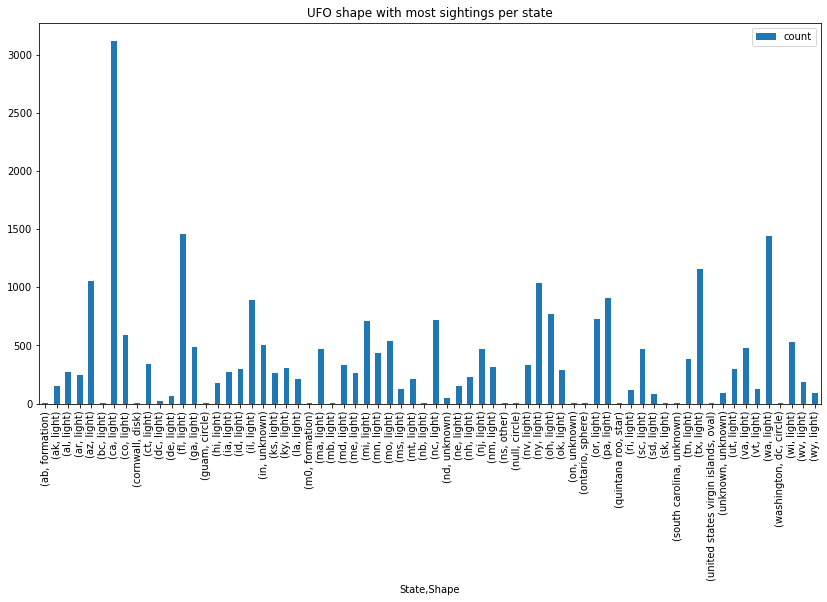

In [0]:
#Most popular shape by State
w = Window.partitionBy("State")
df2 = df.filter(df.Country == "usa")\
        .groupBy("State", "Shape").count().sort(col("State").desc())\
        .withColumn("maxCount", max('count').over(w))\
        .where(col('count') == col('maxCount'))\
        .drop('maxCount')

#display(df2)

df2 = df2.toPandas()
df2.groupby(["State", "Shape"]).sum().plot(figsize=(14,7), kind='bar', title="UFO shape with most sightings per state")

Out[10]: <AxesSubplot:title={'center':'Most common shape of UFO reported over years'}, xlabel='year(Date/Time),Shape'>

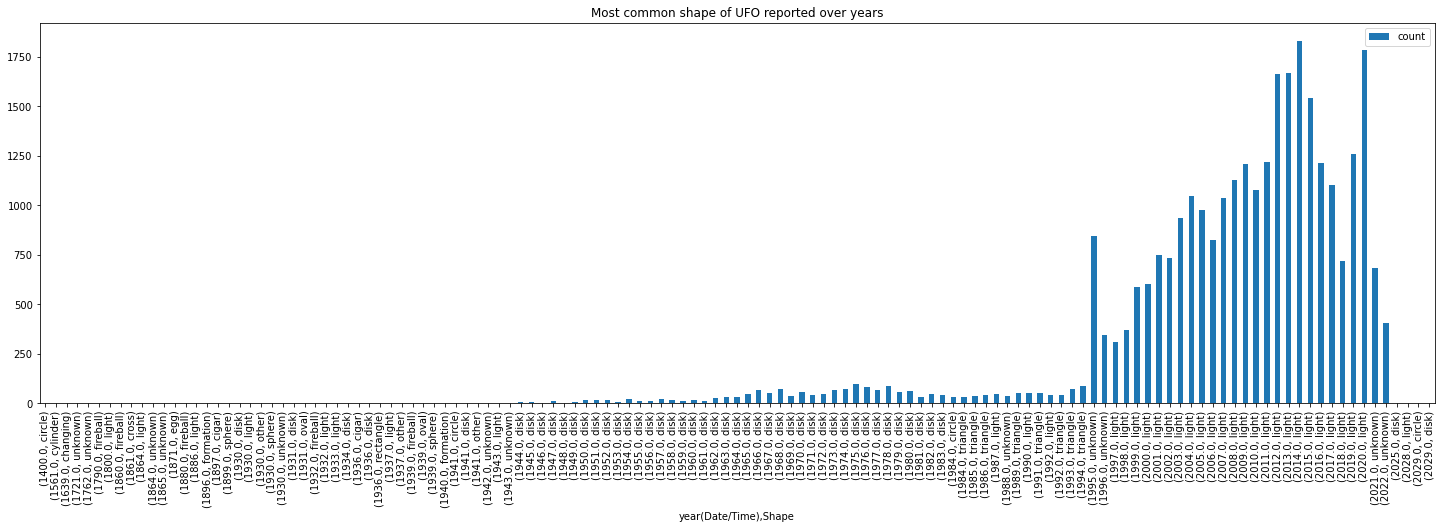

In [0]:
#Most common shape of UFO reported over years
w = Window.partitionBy("year(Date/Time)")
df2 = df.groupBy(year("Date/Time"), "Shape").count().sort(col("year(Date/Time)").desc())\
        .withColumn("maxCount", max('count').over(w))\
        .where(col('count') == col('maxCount'))\
        .drop('maxCount')

#display(df2)
df2 = df2.toPandas()
df2.groupby(["year(Date/Time)", "Shape"]).sum().plot(figsize=(25,7), kind='bar', title="Most common shape of UFO reported over years")

Out[11]: <AxesSubplot:title={'center':'Number of UFO reported for each month'}, xlabel='month(Date/Time)'>

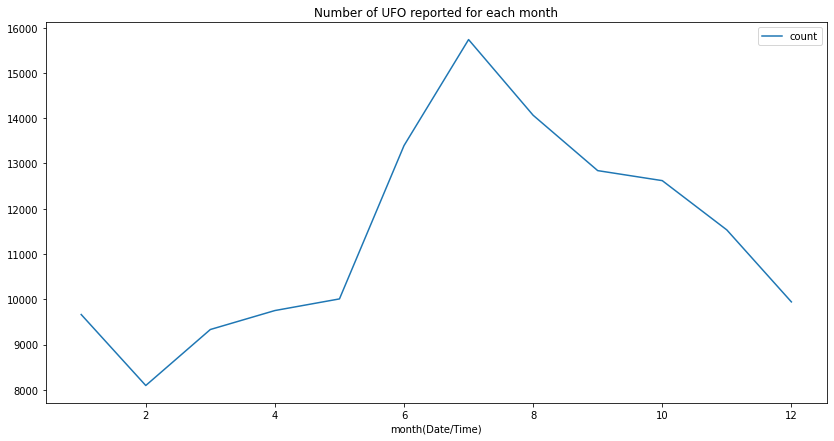

In [0]:
#Number of UFO reported for each month
w = Window.partitionBy("month(Date/Time)")
df2 = df.groupBy(month("Date/Time")).count().sort(col("month(Date/Time)").desc())#obrisao sam on maxcount 3 linije

df2 = df2.toPandas()
df2.groupby(["month(Date/Time)"]).sum().plot(figsize=(14,7), y="count", kind='line', title="Number of UFO reported for each month")

Out[12]: <AxesSubplot:title={'center':'Whether the report contains images or not'}, ylabel='%'>

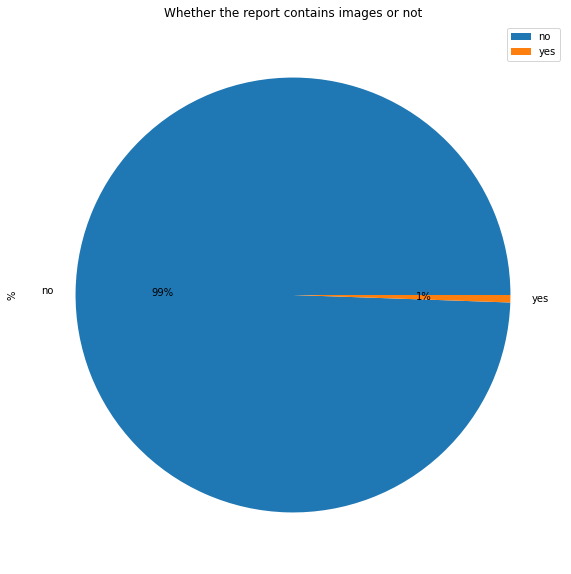

In [0]:
#percent of UFO sighting reports containing pictures
df2 = df.groupBy("Images").count().sort(col("count").desc())\
        .withColumn('%', col('count')/sum('count').over(Window.partitionBy())*100)\
        .withColumn("%", round("%", 2))

#display(df2)
df2 = df2.toPandas()
df2.groupby(["Images"]).sum().plot(figsize=(10,10), kind='pie', y="%", autopct='%1.0f%%', title="Whether the report contains images or not")

##Hypothesis 1:

In USA, number of UFO sighting reports is bigger on 4th of july (Independence Day) than on any other day of the year, and the most common shape of the UFO during that time is "bright light in the sky" (fireworks).

Out[13]: <AxesSubplot:title={'center':'Number of UFO sighting reports per day of year'}, xlabel='Distinct date'>

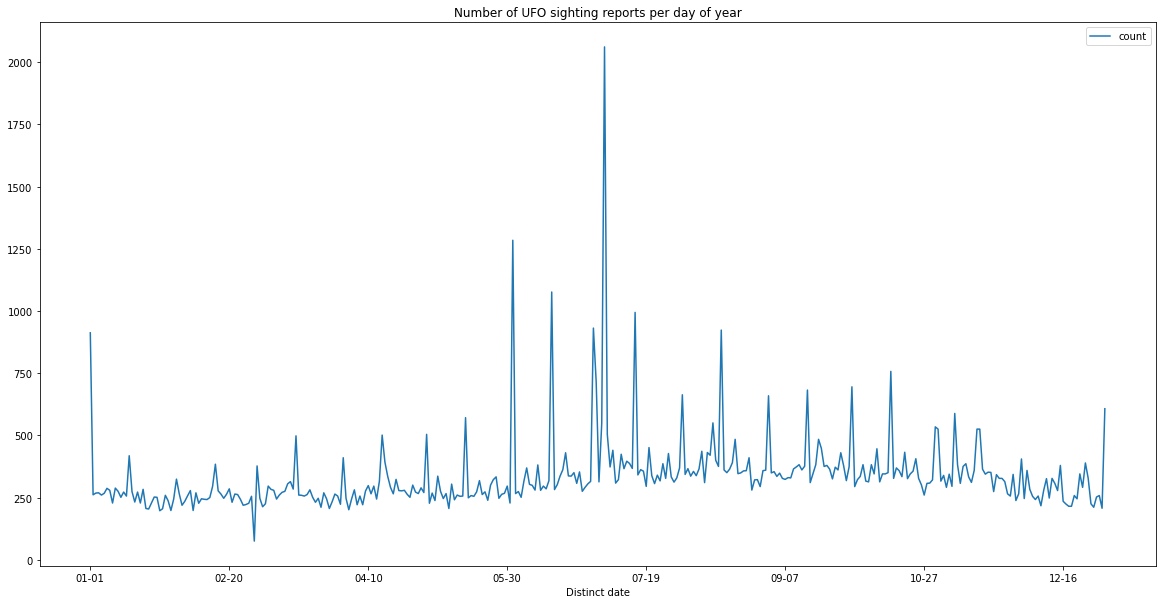

In [0]:
#filter only usa
df2 = df.filter(df.Country == "usa")

#make new date column for easier access
df2 = df2.withColumn("Distinct date", date_format("Date/Time", "MM-dd"))

#count number of reports per distinct day of the year
df2 = df2.groupBy("Distinct date").count().sort(col("count").desc())

#df2.show(3)

df2 = df2.toPandas()
df2.groupby(["Distinct date"]).sum().plot(figsize=(20,10), kind='line', y="count", title="Number of UFO sighting reports per day of year")

#as it is clearly seen, first part of the hypothesis is true

Out[14]: <AxesSubplot:title={'center':'Shapes of UFO sightings on Independece day'}, xlabel='Shape'>

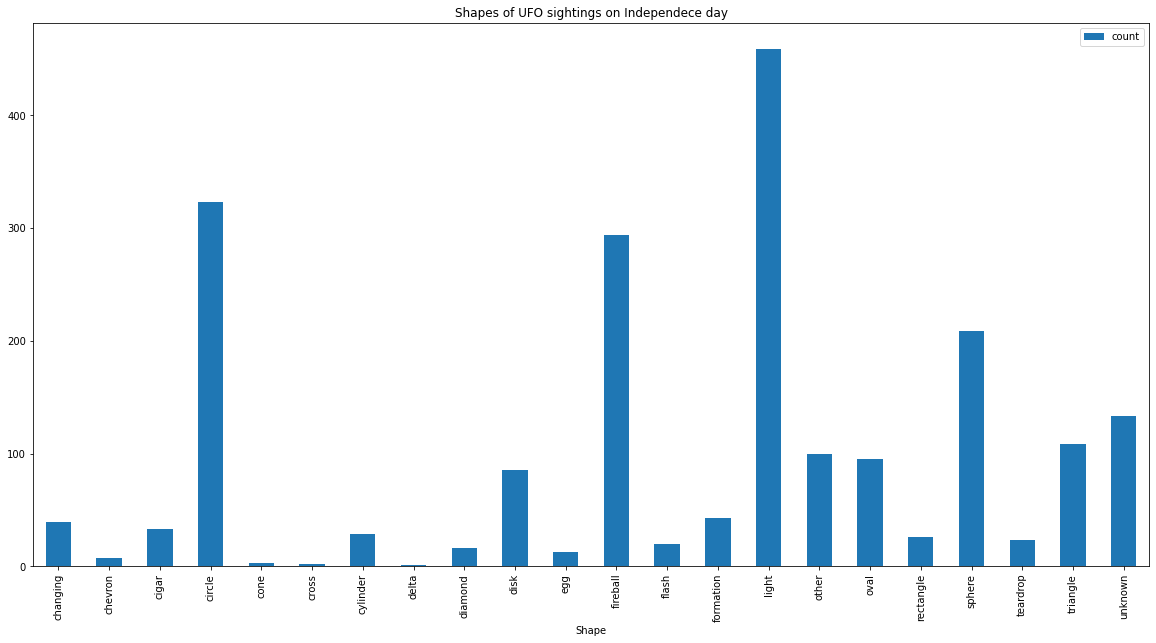

In [0]:
#now to check if bright light is the most common shape during this date

#filter only Independence day
df2 = df.filter(df.Country == "usa")\
        .filter(month("Date/Time") == "7")\
        .filter(date_format("Date/Time", "d") == "4")

df2 = df2.groupBy("Shape").count().sort(col("count").desc())

df2 = df2.toPandas()
df2.groupby(["Shape"]).sum().plot(figsize=(20,10), kind='bar', y="count", title="Shapes of UFO sightings on Independece day")

#second part of the hypothesis is also true so we can say that hypothesis 1 is true

##Hypothesis 2:
Most of the described shapes of the UFO-s (around 40%) correlate to the shape of a weather balloon (oval, sphere, egg, circle, teardrop, fireball), and are, thus, nothing more than weather balloons

All shapes sum:  139232
Balloon shapes sum:  41792
%:  0.3001608825557343
All shapes sum without unknown/other:  113812
%:  0.3672020525076442
Out[15]: <AxesSubplot:title={'center':'Balloon shapes vs others'}, ylabel='count'>

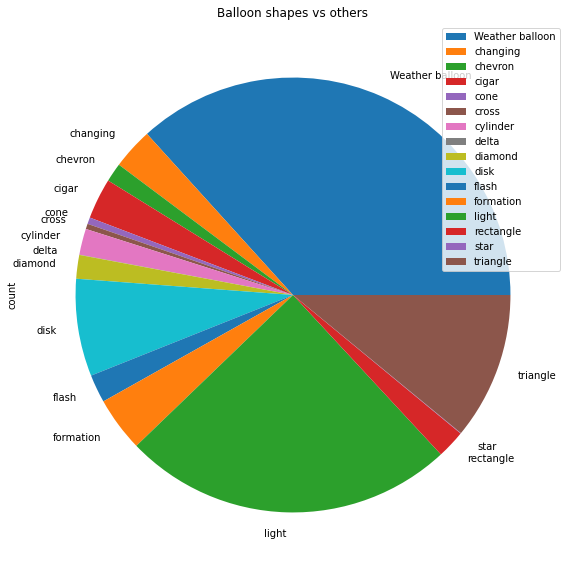

In [0]:
balloon_shapes = ["oval", "sphere", "egg", "circle", "teardrop", "fireball"]

df2 = df.groupBy("Shape").count()

shape_sum = df2.select(sum("count")).collect()[0][0]

print("All shapes sum: ",shape_sum)

balloon_shape_sum = df2.orderBy(col("count").desc())\
                        .filter(df2.Shape.isin(balloon_shapes))\
                        .select(sum("count"))\
                        .collect()[0][0]

print("Balloon shapes sum: ", balloon_shape_sum)

print("%: ", balloon_shape_sum / shape_sum)

#we see its around 30% of balloon shapes so hypothesis 2 could be wrong
#but we also have a huge chunk of "unknown" and "other" shapes, so instead of taking 30% of them lets just drop them

df2_filtered = df2.filter(df2.Shape!="unknown").filter(df2.Shape!="other")
df2_filtered_sum = df2_filtered.select(sum("count")).collect()[0][0]
print("All shapes sum without unknown/other: ", df2_filtered_sum)

print("%: ", balloon_shape_sum / df2_filtered_sum)

df3 = df2_filtered.withColumn("Shape", when(df2.Shape.isin(balloon_shapes), "Weather balloon").otherwise(df.Shape))\
        .orderBy(col("count").desc())

df3 = df3.toPandas()
df3.groupby(["Shape"]).sum().plot(figsize=(20,10), kind='pie', y="count", title="Balloon shapes vs others")

#now percentage of weather balloon shaped ones is around 37% which is very close to hypothesis 40%, and to proving that most of the UFO sightings were probably weather balloons


##Hypothesis 3:

UFO sightings are more frequent during nighttime(18h-06h), but more sightings during daytime (06h-18h) contain pictures

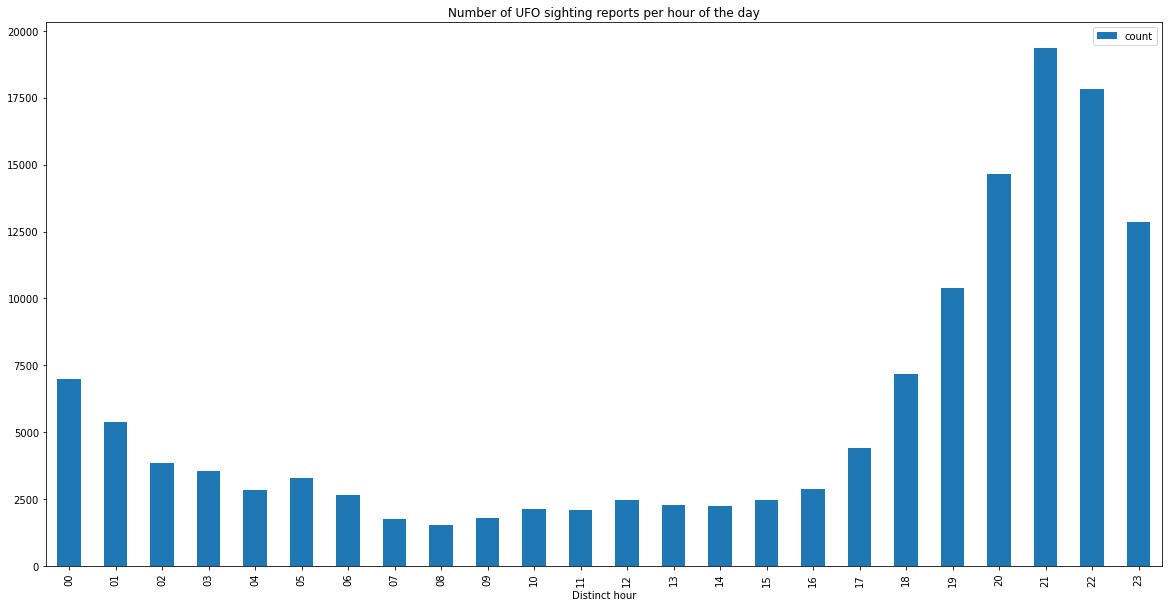

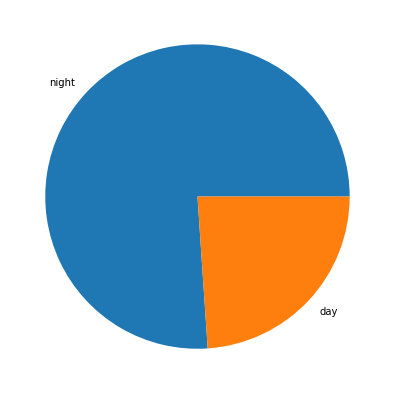

In [0]:
df2 = df.withColumn("Distinct hour", date_format("Date/Time", "HH"))

df3 = df2.groupBy("Distinct hour").count().sort(col("count").desc())

x = df3.select(sum("count")).collect()[0][0]

daytime = df3.filter((col("Distinct hour") > 6) & (col("Distinct hour") <= 18))\
            .select(sum("count"))\
            .collect()[0][0]

nighttime = x - daytime

data = [nighttime, daytime]
labels = ["night", "day"]

df3 = df3.toPandas()
df3.groupby(["Distinct hour"]).sum().plot(figsize=(20,10), kind='bar', y="count", title="Number of UFO sighting reports per hour of the day")

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)
plt.show()

#as seen from the charts, first part of the hypothesis is true

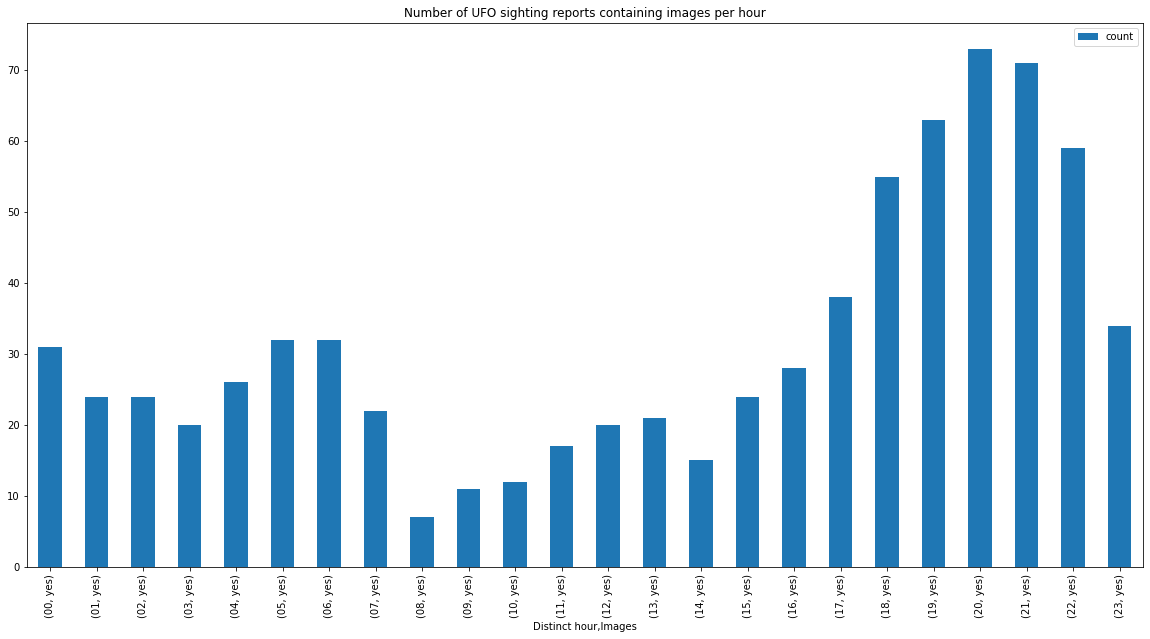

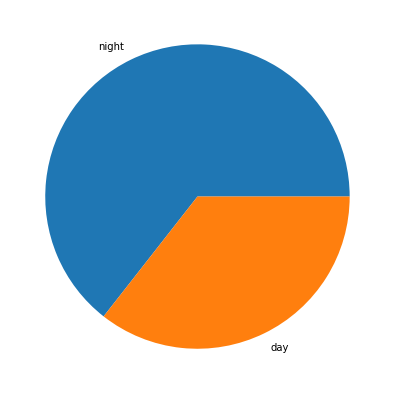

In [0]:
#now to see if more sighting reports during day contain images
df3 = df2.groupby("Distinct hour", "Images").count().filter(col("Images") == "yes")

all_reports_with_images = df.filter(col("Images") == "yes").count()

daytime_reports_with_images = df3.filter((col("Distinct hour") > 6) & (col("Distinct hour") <= 18))\
            .select(sum("count"))\
            .collect()[0][0]

nighttime_reports_with_images = all_reports_with_images - daytime_reports_with_images 

df3 = df3.toPandas()
df3.groupby(["Distinct hour", "Images"]).sum().plot(figsize=(20,10), kind='bar', y="count", title="Number of UFO sighting reports containing images per hour")


data = [nighttime_reports_with_images, daytime_reports_with_images ]
labels = ["night", "day"]

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)
plt.show()

#as seen from the charts, second part of the hypothesis is false, since there are more reports with images during the night, so we can say that hypothesis 3 is false

###Structured Streaming

In [0]:
from pyspark.sql.types import *

schema = StructType([StructField("Date/Time", TimestampType(), True), StructField("City", StringType(), True), StructField("State", StringType(), True),
                    StructField("Country", StringType(), True), StructField("Code", StringType(), True), StructField("Shape", StringType(), True),
                    StructField("Duration", StringType(), True), StructField("Summary", StringType(), True), StructField("Posted", StringType(),True),
                    StructField("Images", StringType(), True)])

In [0]:
sdf = (
    spark
    .readStream
    .schema(schema)
    .option("maxFilesPerTrigger", 1)
    .option("header", "true")
    .csv(file_location)
)

sdf = (                 
  sdf
    .filter((year(col("Date/Time")) <= 2022) & (year(col("Date/Time")) >= 2000))
    .groupBy(
      sdf.Shape, 
      window(col("Date/Time"), "1 week"))
    .count()
)

In [0]:
query = (
  sdf
    .writeStream
    .format("memory")
    .queryName("counts")
    .outputMode("complete")
    .start()
)

In [0]:
sdf.isStreaming

Out[21]: True

In [0]:
%sql
SELECT Shape, date_format(window.end, "yyy-MM-dd") as time, count
FROM counts
WHERE (shape="rectangle" OR shape="disk" OR shape="fireball" OR shape="oval")
ORDER BY time ASC

Shape,time,count
rectangle,2000-01-06,2
fireball,2000-01-06,1
oval,2000-01-06,1
fireball,2000-01-13,1
oval,2000-01-13,1
fireball,2000-01-20,1
disk,2000-01-20,3
disk,2000-01-27,2
rectangle,2000-02-17,1
fireball,2000-02-24,2


In [0]:
%sql
SELECT Shape, date_format(window.end, "yyy-MM-dd") as time, count
FROM counts
WHERE (shape="rectangle" OR shape="disk" OR shape="fireball" OR shape="oval")
ORDER BY time ASC

Shape,time,count
rectangle,2000-01-06,2
oval,2000-01-06,1
fireball,2000-01-06,1
fireball,2000-01-13,2
oval,2000-01-13,3
disk,2000-01-20,3
oval,2000-01-20,1
fireball,2000-01-20,1
disk,2000-01-27,2
fireball,2000-01-27,2


In [0]:
%sql
SELECT Shape, date_format(window.end, "yyy-MM-dd") as time, count
FROM counts
WHERE (shape="rectangle" OR shape="disk" OR shape="fireball" OR shape="oval")
ORDER BY time ASC

Shape,time,count
rectangle,2000-01-06,2
oval,2000-01-06,1
fireball,2000-01-06,1
oval,2000-01-13,3
disk,2000-01-13,1
fireball,2000-01-13,2
oval,2000-01-20,1
fireball,2000-01-20,1
rectangle,2000-01-20,1
disk,2000-01-20,3
